In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = sns.load_dataset("flights")

In [86]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


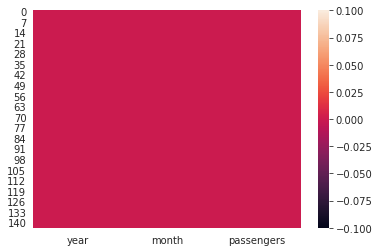

In [87]:
sns.heatmap(df.isnull())

In [88]:
df.columns                    #columns -> 'year', 'month', 'passengers

Index(['year', 'month', 'passengers'], dtype='object')

In [89]:
sns.set_style('darkgrid')

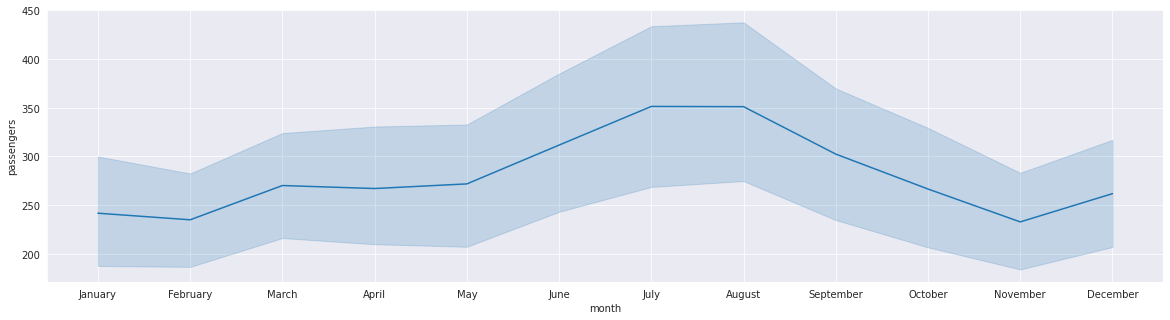

In [90]:
plt.figure(figsize=(20,5))
sns.lineplot(x='month', y='passengers', data=df, )

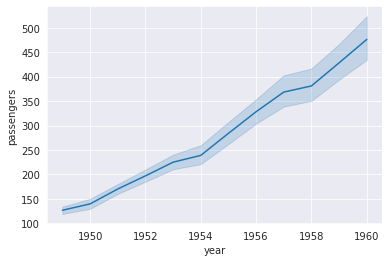

In [91]:
sns.lineplot(x='year', y='passengers', data=df)

In [92]:
month_dict = {'January' : 1, 'February': 2, 'March' : 3, 'April': 4, 'May': 5, 'June' : 6, 'July':7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December' : 12}

In [93]:
df['month'] = df['month'].apply(lambda x: month_dict[x])

In [94]:
X = df.drop('passengers', axis=1)
y = df['passengers']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [96]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [97]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
pred = lm.predict(X_test)

In [99]:
p = {'real_data': y_test, 'prediction': pred}

In [100]:
precision = pd.DataFrame(p)
precision = precision.reset_index()
precision = precision.drop('index', axis=1)

In [101]:
precision.head()

,real_data,prediction
0,234,259.933842
1,508,454.756304
2,125,133.112311
3,302,262.228925
4,435,387.902914


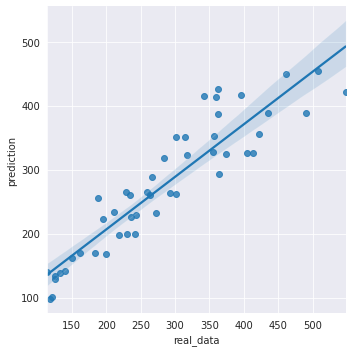

In [102]:
sns.lmplot(x='real_data', y='prediction', data=precision)

In [103]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
year,31.705383
month,1.147541
